Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/manasnayak/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py38hecd8cb5_0 --> conda-forge::conda-4.11.0-py38h50d1736_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
from imblearn import under_sampling, over_sampling

In [4]:
!pip3 install -U scikit-learn scipy matplotlib

In [5]:
conda install py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /Users/manasnayak/opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38h50d173~ --> pkgs/main::conda-4.11.0-py38hecd8cb5_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip uninstall -y numpy

Found existing installation: numpy 1.22.0
Uninstalling numpy-1.22.0:
  Successfully uninstalled numpy-1.22.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip uninstall -y setuptools

Found existing installation: setuptools 60.3.1
Uninstalling setuptools-60.3.1:
  Successfully uninstalled setuptools-60.3.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install setuptools

  Using cached setuptools-60.3.1-py3-none-any.whl (953 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
numba 0.53.1 requires numpy>=1.15, which is not installed.
cufflinks 0.17.3 requires numpy>=1.9.2, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install numpy

  Using cached numpy-1.22.0-cp38-cp38-macosx_10_9_x86_64.whl (17.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Imort all the necessary libraries.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [5]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset contains 908 rows & 25 columns

Data Analysis

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Ensuring that no truncate data in this data set

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

check that it contains 25 columns

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In the above cell we can see that there is missing values in many columns.
Columns names that have more than 50 % of missing data will need to be deleted.

In [9]:
df.drop(["other_fuel1","other_fuel2","other_fuel3","owner","wepp_id","generation_gwh_2013","generation_gwh_2014",
        "generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_data_source","estimated_generation_gwh"],axis=1,inplace=True)

Drop all the columns which have more than 50 % of missing data.

In [10]:
df.shape

(908, 13)

coumns reduced from 25 to 13

In [11]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
source,191


Check the unique data in the dataset

In [12]:
df.drop(["country","country_long","year_of_capacity_data","name","gppd_idnr","url"],axis=1,inplace=True)

We have drop 6 more columns that we are not providing any useful insight for our prediction model  

In [13]:
print(df.shape)
df.head()

(908, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


Our new dataset contains 908 rows & 7 columns

In [14]:
df.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

After that we still have missing data in the dataset columns that will be treated now

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   latitude            862 non-null    float64
 2   longitude           862 non-null    float64
 3   primary_fuel        908 non-null    object 
 4   commissioning_year  528 non-null    float64
 5   source              908 non-null    object 
 6   geolocation_source  889 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.8+ KB


We have 4 float datatype & 3 datatype

In [16]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ",object_datatype) 


float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ",float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


Now we have separate columns name

In [17]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [18]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

Now we have successfully taken care of missing data in the dataset

In [19]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  520
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Jk Cement ltd                                                    4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Acc Acc ltd                                                      4
Reliance Power Ltd                                               4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
PEDA                                                             3
Ministry of New and Renewable Energy                             3
Hindustan Zinc ltd     

In the above cell i m tooking all object datatype columns

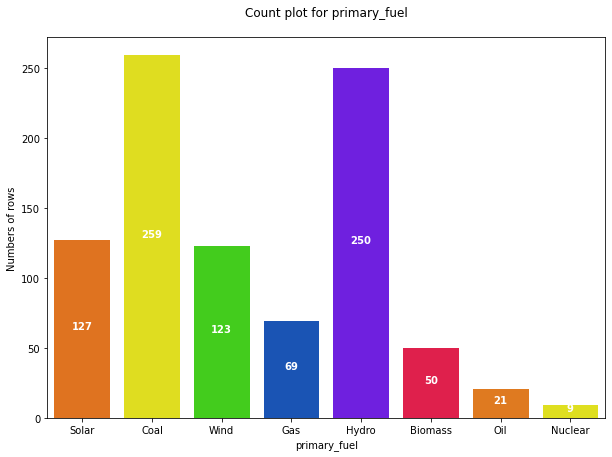

In [20]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "primary_fuel"column we can see that the highest number of values have been covered by coal and hydro.

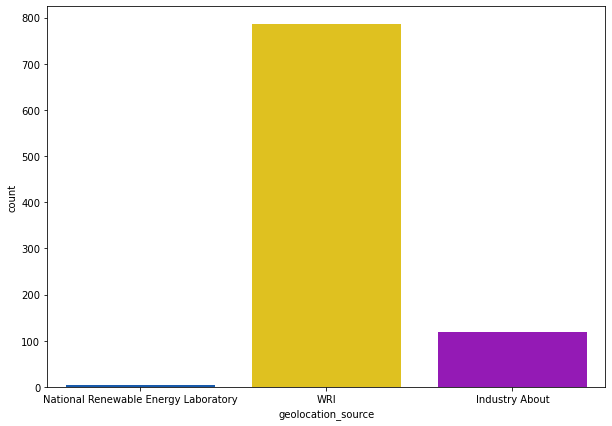

In [21]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.et_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot 'geolocation_source' column we see that the highest data value is covered by WRI opion and least has been taken by National renewable energy laboratory

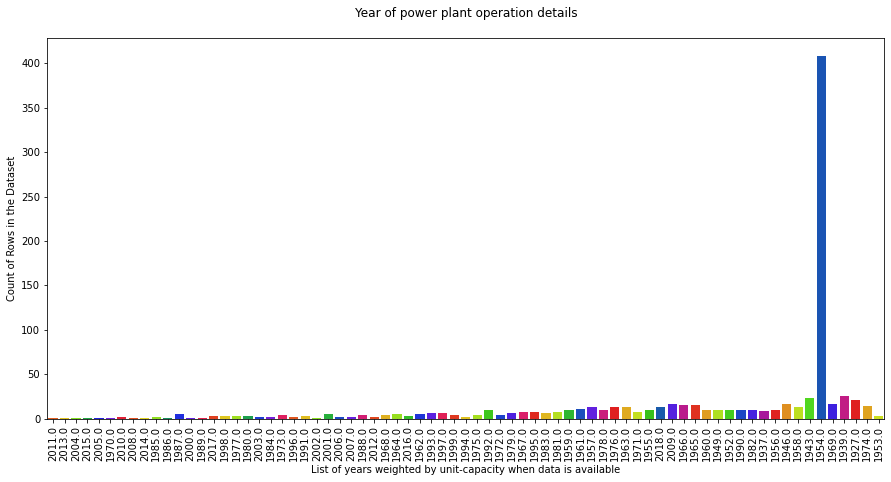

In [22]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"],palette="prism")
diag.set_xticklabels(labels=values,rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available.

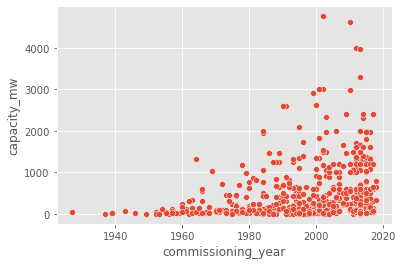

In [23]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year",y = 'capacity_mw',data=df)
plt.show()

In the above sctter plot we can see that the electric generating capacity measure in mega watts was pretty in the olden times as compared to recent years due to invention of efficient fuel types used for power generation.

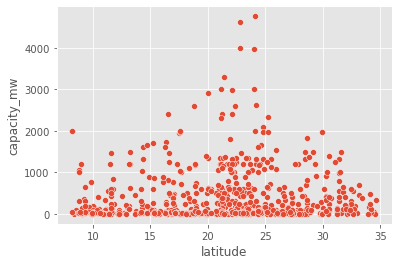

In [24]:
sns.scatterplot(x = "latitude",y = 'capacity_mw',data=df)
plt.show()

in the above scatter plot we can see that the latitude geolocation for electric generation is highest measuring the mega waits between 20 to 25 decimaldegrees. 

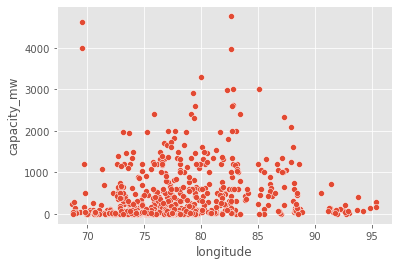

In [25]:
sns.scatterplot(x = "longitude",y = 'capacity_mw',data=df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricity generation is highest measuring the mega watts around 70 and then again between 80-85 decimmal degrees.

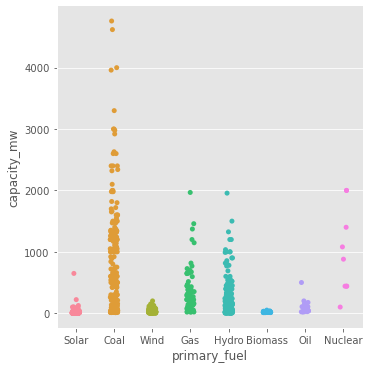

In [26]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel",y = 'capacity_mw',data=df)
plt.show()

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values consideringthe water bodies that help in generating electicity at a power plant.

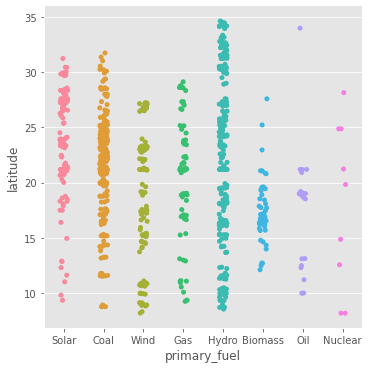

In [27]:
sns.catplot(x = "primary_fuel",y = 'latitude',data=df)
plt.show()

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating elecricity at a powerplant .

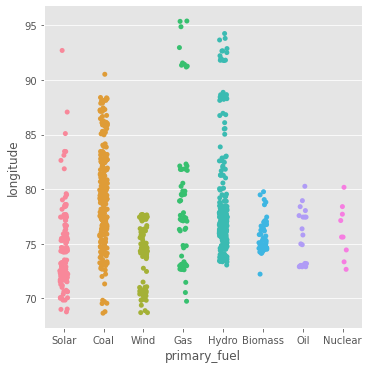

In [28]:
sns.catplot(x = "primary_fuel",y = 'longitude',data=df)
plt.show()

In the above categorical plot we can see that longitude wise decimal degrees have quite a spiltting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal areas rely mostly on hydro fuel type.

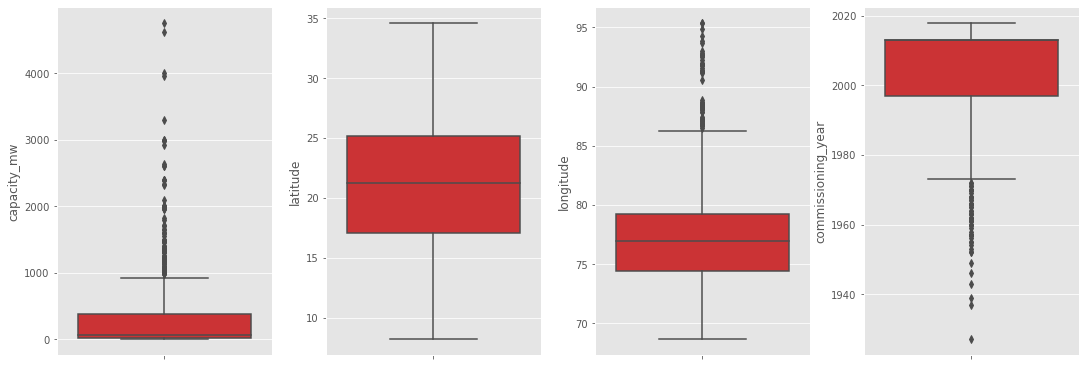

In [29]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.

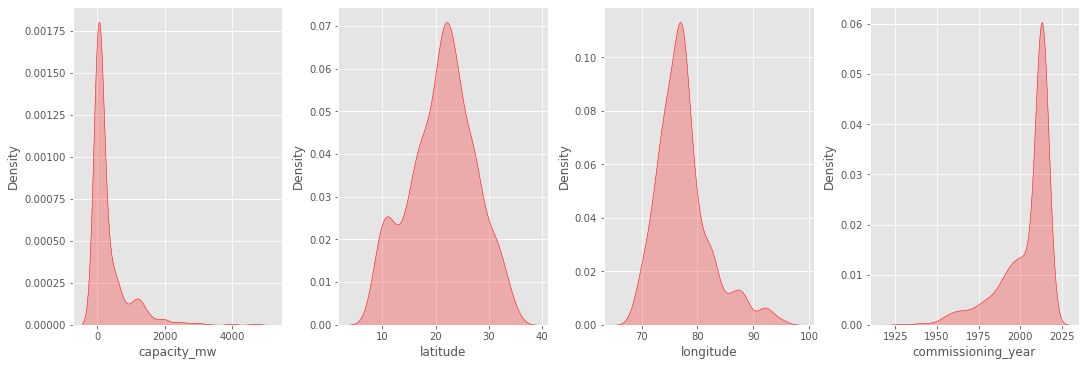

In [30]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade":True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above distribution plot created for our numerical sdata columns we see skewness and that will need to be treated before we can proceed with our model building process. 

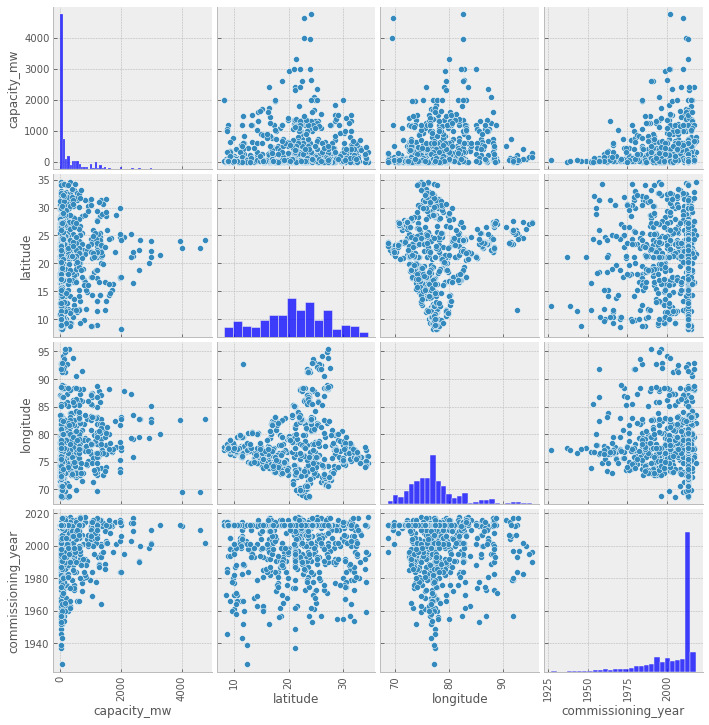

In [31]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x",labelrotation=90)
plt.show()   

From the above pair plot we can see the data distribution amongst the numericaldata type columns.

Encoding all the object datatype columns

In [32]:
#Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


I am using label encoder on our target column "primary-fuel" since we want our labels to be converted from the object datatype to numerical datatype.

In [33]:
# ORDINAL ENCODER

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


I  am using the OridinalEncoder to convert all the categorical feature columns from object datatype to numerical datatype.

Correlation using a Heatmap

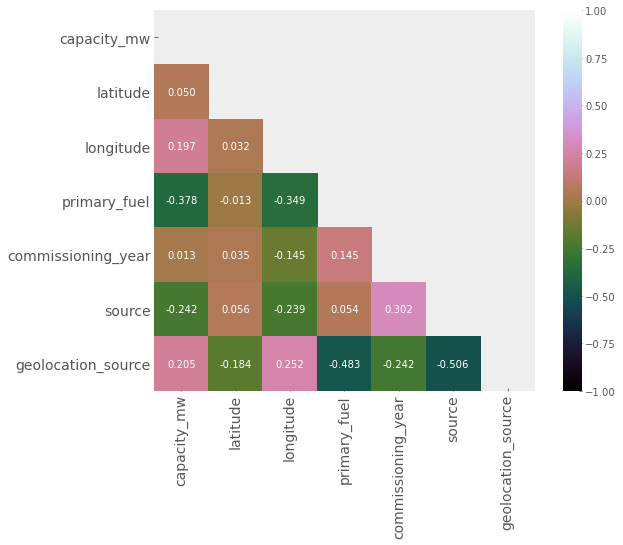

In [34]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above heatmap we can see that our target labels "capacity_cw" and "primary_fuel" has both positive and negavite correlation with the remaining feature columns.

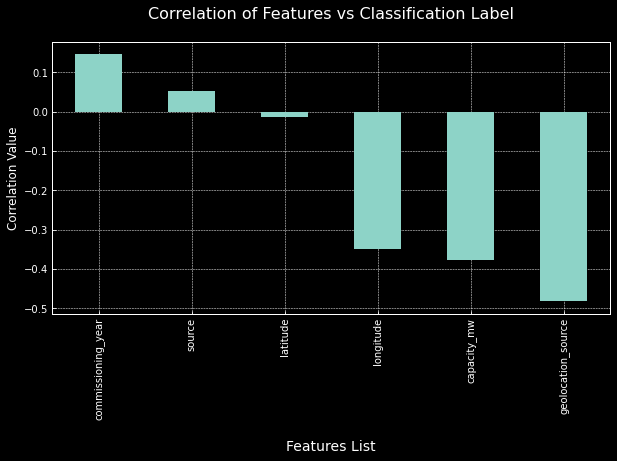

In [35]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with negative correlation. 

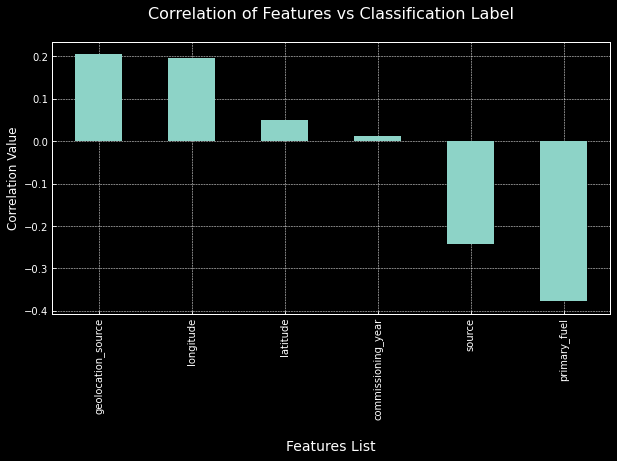

In [36]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with negative correlation.

Using Z score to remove outliers 

In [37]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print("Shape of the dataframe before removing outliers",df.shape)
print("Shape of the dataframe after removing outliers",df1.shape)
print("Percentage of data loss post outliers removal", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers (908, 7)
Shape of the dataframe after removing outliers (839, 7)
Percentage of data loss post outliers removal 7.599118942731277


I have used the Zscore method to remove the outliers scince the IQR method was making me lose way more than 10 precentage data which i could not have afforded to close. 

In [38]:
df.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

The skew method we see that there are columns present in our dataset that are above the acceptable range of +/- 0.5 skewnessvalue.

Using log transform to fix skewness

In [39]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transfromation on our numerical float we dont have skewness in our dataset.

Splitting the dataset into 2 variables namely 'x' AND'Y' for feature and classification label

In [40]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

I have bifurcated the dataset into features and classification label where X represents the feature columns and  Y represents the classification target label column.

Resolving the class imbalance issue in our label column

In [41]:
Y.value_counts()

1    237
3    219
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

Listing the values of our classification label column to count the number of rows occupied by each category .

In [42]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X,Y)

smote is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [43]:
Y.value_counts()

0    237
1    237
2    237
3    237
4    237
5    237
6    237
7    237
Name: primary_fuel, dtype: int64

Feature Scaling

In [44]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.754213,1.440338,-0.865330,0.517558,1.402880,-1.186769
1,0.156682,0.840281,-0.469535,0.690284,2.872351,0.368770
2,-0.358583,0.337688,-2.024794,0.690284,-0.586559,0.368770
3,0.338224,0.683121,3.867528,-0.086984,-0.563952,0.368770
4,1.815232,0.347608,1.658289,0.863010,-0.563952,0.368770


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

Finding best random state for building classifiscation models 

In [45]:
maxAccu=0
maxRS=0

for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i
        
print("Best accuracy score is",maxAccu,"on Random State",maxRS)        

Best accuracy score is 71.94092827004219 on Random State 273


WE found our lucky number to be 45.

In [46]:
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=45)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n",class_report)
    
    acc_score = (accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

Machine learning model 

In [47]:
#Logistic Regression

model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        60
           1       0.54      0.55      0.54        55
           2       0.48      0.27      0.35        44
           3       0.59      0.56      0.58        71
           4       0.70      0.86      0.77        72
           5       0.57      0.42      0.48        60
           6       1.00      0.98      0.99        59
           7       0.81      0.98      0.89        53

    accuracy                           0.69       474
   macro avg       0.67      0.68      0.67       474
weighted avg       0.68      0.69      0.68       474

Accuracy Score: 69.40928270042194
Cross Validation Score: 66.45618664074433

Accuracy Score - Cross Validation Score is 2.9530960596776055


In [48]:
#support vector classifier

model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        60
           1       0.60      0.56      0.58        55
           2       0.68      0.34      0.45        44
           3       0.80      0.69      0.74        71
           4       0.73      1.00      0.85        72
           5       0.71      0.75      0.73        60
           6       1.00      0.98      0.99        59
           7       0.84      1.00      0.91        53

    accuracy                           0.79       474
   macro avg       0.79      0.77      0.77       474
weighted avg       0.79      0.79      0.78       474

Accuracy Score: 79.11392405063292
Cross Validation Score: 79.06138036383837

Accuracy Score - Cross Validation Score is 0.052543686794550126


In [49]:
#DecisionTreeClassifier


model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.63      0.58      0.60        55
           2       0.60      0.66      0.63        44
           3       0.76      0.77      0.77        71
           4       0.86      0.85      0.85        72
           5       0.89      0.80      0.84        60
           6       1.00      1.00      1.00        59
           7       0.95      1.00      0.97        53

    accuracy                           0.83       474
   macro avg       0.83      0.83      0.83       474
weighted avg       0.83      0.83      0.83       474

Accuracy Score: 83.33333333333334
Cross Validation Score: 84.81099847243439

Accuracy Score - Cross Validation Score is -1.477665139101049


In [50]:
#RandomForestClassifier


model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.79      0.69      0.74        55
           2       0.81      0.77      0.79        44
           3       0.91      0.86      0.88        71
           4       0.84      0.99      0.90        72
           5       0.94      0.83      0.88        60
           6       1.00      1.00      1.00        59
           7       0.95      1.00      0.97        53

    accuracy                           0.90       474
   macro avg       0.90      0.89      0.89       474
weighted avg       0.90      0.90      0.90       474

Accuracy Score: 89.87341772151899
Cross Validation Score: 90.13720316622693

Accuracy Score - Cross Validation Score is -0.26378544470793486


In [51]:
#KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        60
           1       0.70      0.47      0.57        55
           2       0.53      0.52      0.53        44
           3       0.90      0.66      0.76        71
           4       0.78      0.94      0.86        72
           5       0.74      0.80      0.77        60
           6       0.98      0.98      0.98        59
           7       0.80      0.98      0.88        53

    accuracy                           0.80       474
   macro avg       0.78      0.79      0.78       474
weighted avg       0.80      0.80      0.79       474

Accuracy Score: 79.53586497890295
Cross Validation Score: 78.90251353978613

Accuracy Score - Cross Validation Score is 0.6333514391168222


In [52]:
#ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.75      0.71      0.73        55
           2       0.84      0.82      0.83        44
           3       0.88      0.86      0.87        71
           4       0.86      0.96      0.91        72
           5       0.96      0.85      0.90        60
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.90       474
   macro avg       0.90      0.90      0.90       474
weighted avg       0.90      0.90      0.90       474

Accuracy Score: 90.29535864978902
Cross Validation Score: 91.13928621024859

Accuracy Score - Cross Validation Score is -0.8439275604595622


Hyper parameter tuning classification on best model

In [53]:
fmod_param = {'criterion' : ["gini","entropy"],
             'n_jobs':[2,1,-1],
             'min_samples_split':[2,3,4],
             'max_depth':[20,25,30],
             'random_state':[42,45,111]
             }

In [54]:
GSCV = GridSearchCV(ExtraTreesClassifier(),fmod_param,cv=5)

This is using for best model classification

In [55]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

It should check for best possible outcomes.

In [56]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_split': 3,
 'n_jobs': 2,
 'random_state': 45}

Here the grid search CV has provided me with the best parameters list out of all the combinations

In [57]:
Final_Model = ExtraTreesClassifier(criterion="gini",max_depth=30,min_samples_split=4, n_jobs=2,random_state=42)
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test,fmod_pred))*100
print("Accuracy scorefor the Best Model is:",fmod_acc)

Accuracy scorefor the Best Model is: 89.66244725738397


I have sucessfully incorporate the hyper parameter tuning on my final classification model and received the accuracy score for it.

AUC ROC Curve for multi class label

In [58]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test,y_prob,multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test,y_prob,multi_class="ovo",average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test,y_prob,multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test,y_prob,multi_class="ovr",average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.993496 (macro),
0.993133 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.993072 (macro),
0.992695 (weighted by prevalence)


I have generated the ROC curve for my final classification model and it shows the one-vs-one roc auc score and one-vs-rest roc auc scores

Confusion matric

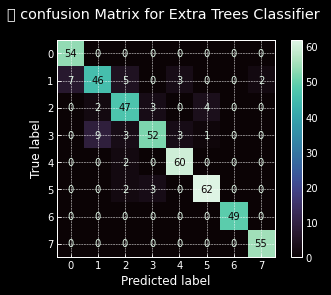

In [59]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier,X_test,Y_test,cmap='mako')
plt.title('\t confusion Matrix for Extra Trees Classifier \n')
plt.show()

With the help of above confusion matrix i m able to understand the number of times i got the correct outputs and the number of times my model missed to provide the correct prediction >

In [60]:
filename = "FinalModel_Classification_E04.pkl"
joblib.dump(Final_Model,filename)

['FinalModel_Classification_E04.pkl']

Saving the best  classification ML model

Splitting the dataset into 2 variables namely 'x' AND'Y' for feature and REGRESSION label

In [61]:
X = df.drop('capacity_mw',axis=1)
Y = df['capacity_mw']

I have bifurcated the dataset into features and classification label where X represents the feature columns and Y represents the classification target label column.

Feature Scaling

In [62]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.154079,-0.911736,1.175163,0.468797,1.580000,-1.060641
1,0.598056,-0.567417,-0.983247,0.618009,3.127148,0.400570
2,0.132345,-1.920402,1.606845,0.618009,-0.514600,0.400570
3,0.452429,3.205575,-0.551565,-0.053442,-0.490798,0.400570
4,0.141538,1.283666,-0.983247,0.767220,-0.490798,0.400570


Finding the best random state for buildng regression model

In [63]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test,pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
        
print("Best R2 score is",maxAccu,"on Random State",maxRS)  

Best R2 score is 0.5383340720045708 on Random State 135


we found our lucky number is 135.

In [64]:
def reg(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=135)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    rmse = mean_squared_error(Y_test,pred,squared=False)
    print("RMSE Score is :",rmse)
    
    r2 = r2_score(Y_test,pred,multioutput='variance_weighted')*100
    print("R2 score is:",r2)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = r2 - cv_score
    print("R2 score - Cross Validation Score is",result)

In [65]:
#Linear Regression

model=LinearRegression()
reg(model,X,Y)

RMSE Score is : 1.2755006251261407
R2 score is: 53.83340720045708
Cross Validation Score: 42.231770897477126
R2 score - Cross Validation Score is 11.601636302979955


In [66]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is : 1.2754999383789571
R2 score is: 53.833456913908286
Cross Validation Score: 42.25804411938349
R2 score - Cross Validation Score is 11.575412794524794


In [67]:
#Lasso Regression

model=Lasso(alpha=1e-2,normalize=True,max_iter=1e5)
reg(model,X,Y)

RMSE Score is : 1.4028822860149066
R2 score is: 44.15183151646706
Cross Validation Score: 37.52199723471622
R2 score - Cross Validation Score is 6.6298342817508455


In [68]:
#support vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is : 1.164455614266724
R2 score is: 61.52201239071927
Cross Validation Score: 47.63562285903829
R2 score - Cross Validation Score is 13.886389531680976


In [69]:
#DecisionTreeRegressor


model=DecisionTreeRegressor(criterion="poisson",random_state=111)
reg(model,X,Y)

RMSE Score is : 1.6074216499271625
R2 score is: 26.679385003570566
Cross Validation Score: 25.30991672378181
R2 score - Cross Validation Score is 1.3694682797887552


In [70]:
#RandomForestRegressor

model=RandomForestRegressor(max_depth=2,max_features='sqrt')
reg(model,X,Y)

RMSE Score is : 1.2366662345504955
R2 score is: 56.60182382501732
Cross Validation Score: 45.805577983034816
R2 score - Cross Validation Score is 10.796245841982504


In [71]:
#KNeighborsRegressor

model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')
reg(model,X,Y)

RMSE Score is : 1.3264328368775808
R2 score is: 50.072824060867035
Cross Validation Score: 48.08391357003562
R2 score - Cross Validation Score is 1.9889104908314152


In [72]:
#GradientBoostingRegressor

model=GradientBoostingRegressor(loss='quantile',n_estimators=200,max_depth=5)
reg(model,X,Y)

RMSE Score is : 1.531291981982242
R2 score is: 33.46004708152376
Cross Validation Score: 4.648515073830419
R2 score - Cross Validation Score is 28.811532007693344


In [73]:
#AdaBoostRegressor

model=AdaBoostRegressor(n_estimators=300,learning_rate=1.05,random_state=42)
reg(model,X,Y)

RMSE Score is : 1.1131522779037217
R2 score is: 64.83783310530653
Cross Validation Score: 55.637601015967334
R2 score - Cross Validation Score is 9.200232089339195


In [74]:
#ExtraTreesRegressor

model=ExtraTreesRegressor(n_estimators=200,max_features='sqrt',n_jobs=6)
reg(model,X,Y)

RMSE Score is : 1.020512256461572
R2 score is: 70.44690824087438
Cross Validation Score: 63.49624005354644
R2 score - Cross Validation Score is 6.950668187327942


In [75]:
#XGBRegressor

model=XGBRegressor()
reg(model,X,Y)

RMSE Score is : 1.007419897819593
R2 score is: 71.20032935535696
Cross Validation Score: 58.83430991273036
R2 score - Cross Validation Score is 12.366019442626595


Hyper parameter turning into regression model

In [76]:
fmod_param = {'criterion' : ["mse","mae"],
              'n_estimators':[100,200],
              'min_samples_split':[2,3],
              'random_state':[42,135],
              'n_jobs':[-1,1]
             }

After comparing all the regression models I have selected Extra Trees Regressor as my best regression model and have listed down it's parameters above referring the sklearn webpage.

In [77]:
GSCV = GridSearchCV(ExtraTreesRegressor(),fmod_param,cv=5)

I am using gridsearch CV METHOD FOR TUrning into best regression model

In [78]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [79]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

Gridsearch cv using best possible outcomes

In [80]:
Final_Model = ExtraTreesRegressor(criterion="mse",min_samples_split=3,n_estimators=100 ,n_jobs=1,random_state=42)
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test,fmod_pred)*100
print("R2 score for the Best Model is:",fmod_r2)

R2 score for the Best Model is: 64.67940964355321


I have successfully incoprate the hyper parameter on my Regression model and received R2 score.

Saving the best regression ML model

In [82]:
filename = "FinalModel_Regression_E04.pkl"
joblib.dump(Final_Model,filename)

['FinalModel_Regression_E04.pkl']